# 0.0. IMPORTS

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## 0.1. Loading Data

In [4]:
df = pd.read_csv('../data/cardio_train.csv',sep=';')

## 0.2. Helper Fuctions

In [9]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0. DATA DESCRIPTION

In [10]:
df1 = df.copy()

## 1.1. Data Dimensions

In [11]:
print(f'number of rows: {df1.shape[0]}')
print(f'number of columns: {df1.shape[1]}')

number of rows: 70000
number of columns: 13


## 1.2. Data Types

In [12]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3. Check NA

In [13]:
df1.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4. Change Age

In [14]:
df1['age'] = df1['age'].apply(lambda x: round(x / 365))
df1['weight'] = df1['weight'].apply(lambda x: round(x))

# 2.0. DESCRIPTIVE ANALYSIS

In [15]:
df2 = df1.copy()

## 2.1. Numerical

In [16]:
da = pd.DataFrame({

    'min': df2.apply(lambda x: x.min()), 
    'max': df2.apply(lambda x: x.max()),
    'range': df2.apply(lambda x: x.max() - x.min()),

    'mean': df2.apply(lambda x: x.mean()),
    'median': df2.apply(lambda x: x.median()),
    'std': df2.apply(lambda x: np.std(x)),

    'skew': df2.apply(lambda x: x.skew()),
    'kurtosis': df2.apply(lambda x: x.kurtosis())
})

da #1 female - 2 male

,min,max,range,mean,median,std,skew,kurtosis
id,0,99999,99999,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
age,30,65,35,53.338686,54.0,6.765246,-0.306444,-0.821815
gender,1,2,1,1.349571,1.0,0.476835,0.630960,-1.601935
height,55,250,195,164.359229,165.0,8.210068,-0.642187,7.943653
weight,10,200,190,74.205543,72.0,14.395726,1.012070,2.586848
ap_hi,-150,16020,16170,128.817286,120.0,154.010319,85.296214,7580.074738
ap_lo,-70,11000,11070,96.630414,80.0,188.471184,32.114083,1425.914585
cholesterol,1,3,2,1.366871,1.0,0.680245,1.587123,0.993901
gluc,1,3,2,1.226457,1.0,0.572266,2.397462,4.294377
smoke,0,1,1,0.088129,0.0,0.283482,2.905867,6.444250


# 3.0. FEATURE ENGINEERING

In [25]:
df3 = df2.copy()

In [26]:
df3['imc'] = df3.apply(lambda x: x['weight'] / (x['height'] * x['height']), axis=1).astype(str)
df3['imc'] = df3['imc'].apply(lambda x: x[4:6]).astype(int)

df3['classificacao_imc'] = df3['imc'].apply(lambda x: 'abaixo_do_peso' if x <= 18 else
         'peso_normal' if x >= 19 and x <= 25 else 
         'sobrepeso' if x >= 26 and x <= 30 else
         'obesidade_grau_1 ' if x >= 31 and x <= 35 else
         'obesidade_grau_2'  if x >= 32 and x <= 40 else
         'obesidade_grau_3' if x >= 33 and x <= 40 else
         'Obesidade_grau_4'
         )

# 4.0. DATA ANALYSIS

In [28]:
df4 = df3.copy()

## 4.1. LIST HYPOTHESIS

- Pessoas que fumam tem mais doenças cardiovasculares.

- Pessoas que não praticam atividade fisica tem mais propenças doenças cardiovasculares.


- Pessoas de até 30 anos são os que tem menos doenças cardiovasculares.

- Pessoas acima do peso tem mais doenças cardiovasculares.

### 4.1.0. Validate Hypothesis

#### Pessoas que fumam tem mais doenças cardiovasculares.


In [18]:
aux = df4[['smoke', 'cardio']].groupby('smoke').sum().reset_index()
aux

,smoke,cardio
0,0,32050
1,1,2929


#### Pessoas que não praticam atividade fisica tem mais doenças cardiovasculares.


In [19]:
aux = df4[['active', 'cardio']].groupby('active').sum().reset_index()
aux

,active,cardio
0,0,7361
1,1,27618


#### Pessoas de até 30 anos não tem doenças cardiovasculares.


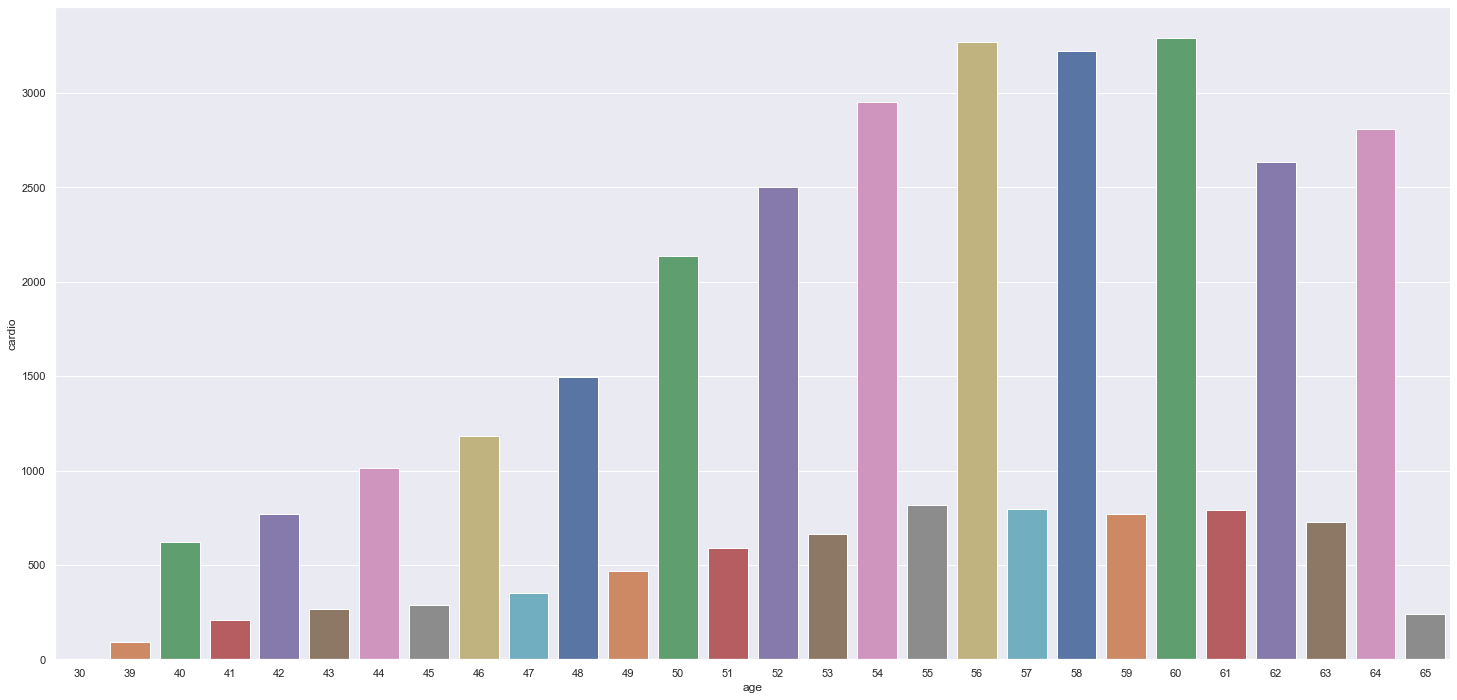

In [20]:
aux = df4[df4['age'] >= 30]
aux = aux[['age', 'cardio']].groupby('age').sum().reset_index()#.sort_values(by='cardio', ascending=True)
sns.barplot(x='age', y='cardio', palette="deep", data=aux);

#### Pessoas acima do peso tem mais doenças cardiovasculares.

In [21]:
df4['imc'] = df4.apply(lambda x: x['weight'] / (x['height'] * x['height']), axis=1).astype(str)
df4['imc'] = df4['imc'].apply(lambda x: x[4:6]).astype(int)

df4['classificacao_imc'] = df4['imc'].apply(lambda x: 'abaixo_do_peso' if x <= 18 else
         'peso_normal' if x >= 19 and x <= 25 else 
         'sobrepeso' if x >= 26 and x <= 30 else
         'obesidade_grau_1 ' if x >= 31 and x <= 35 else
         'obesidade_grau_2'  if x >= 32 and x <= 40 else
         'obesidade_grau_3' if x >= 33 and x <= 40 else
         'Obesidade_grau_4'
         )

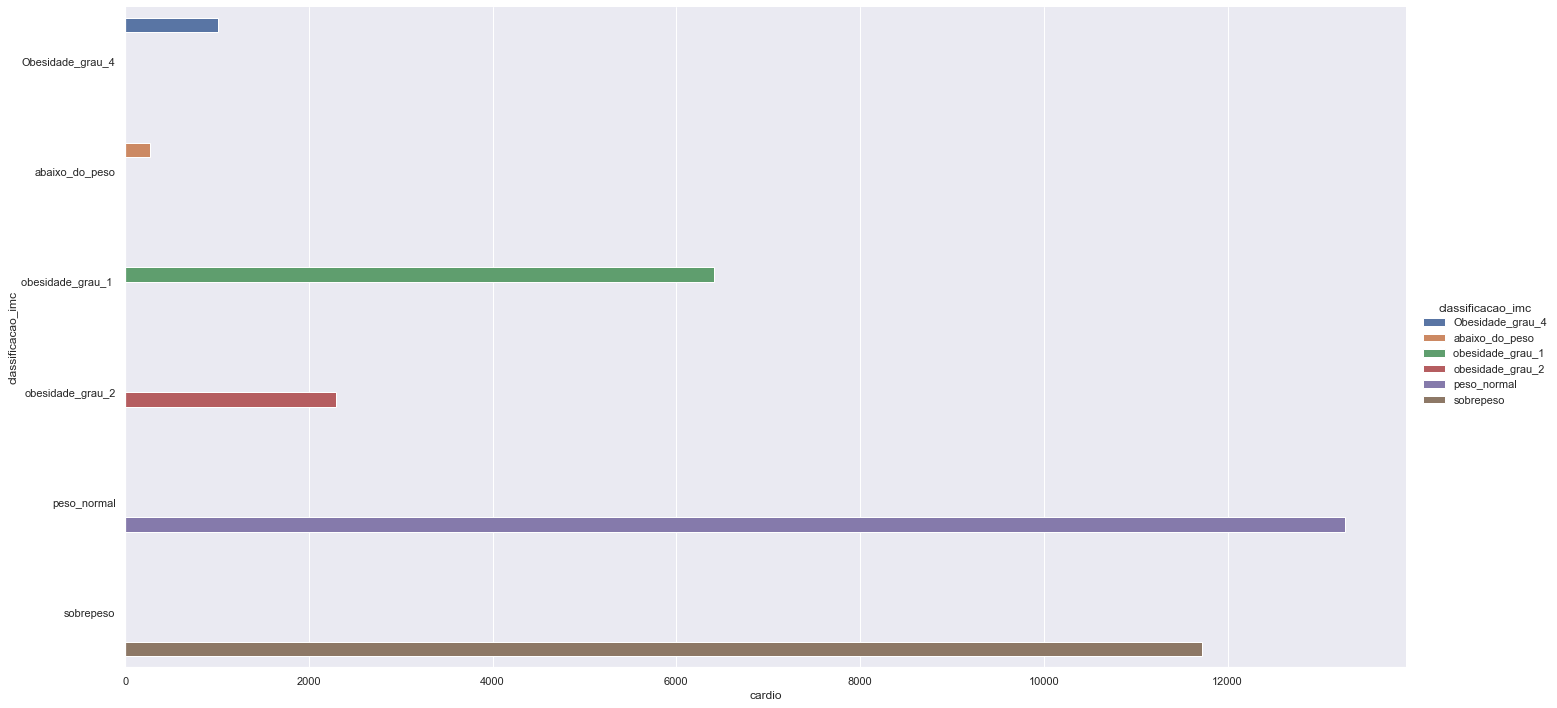

In [22]:
aux = df4[['classificacao_imc', 'cardio']].groupby('classificacao_imc').sum().reset_index()

sns.catplot(
    data=aux, kind="bar",
    x="cardio", y="classificacao_imc", hue="classificacao_imc",
    height=10, aspect=2
);

# 5.0. DATA PREPARATION

In [23]:
df5 = df4.copy()

In [24]:
df5.dtypes

id                    int64
age                   int64
gender                int64
height                int64
weight                int64
ap_hi                 int64
ap_lo                 int64
cholesterol           int64
gluc                  int64
smoke                 int64
alco                  int64
active                int64
cardio                int64
imc                   int64
classificacao_imc    object
dtype: object